In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline


In [2]:
path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"
df = pd.read_csv(path)
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
# Select features
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


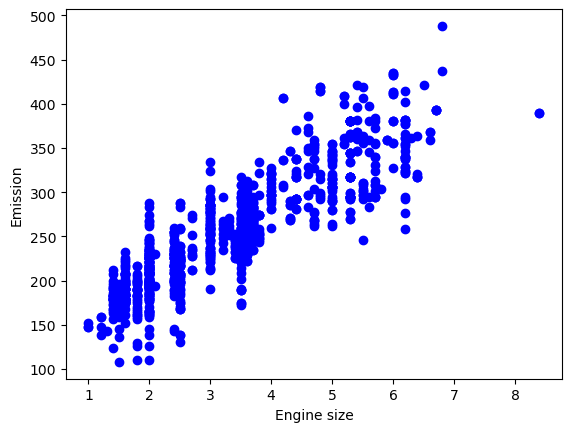

In [6]:
# jupyter notebook 다크모드에서 그래프 보이게하기
plt.style.use(['default'])
# Plotting
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [7]:
# Create train and test dataset
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [11]:
# Preprocessing data for polynomial regression model
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

# poly.fit_transform method는 x value를 수집해 n차수를 같는 행렬로 변환한다
poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  1.5 ,  2.25],
       ...,
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24]])

In [12]:
# We can also use linear regression to solve it since it has same form of multiple linear regression
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print('Coefficients: ', clf.coef_)
print('Intercept: ', clf.intercept_)
# 3 coefficients are generated since degree is 2, degree=0 included

Coefficients:  [[ 0.         50.58891205 -1.53938718]]
Intercept:  [106.99933039]


Text(0, 0.5, 'Emission')

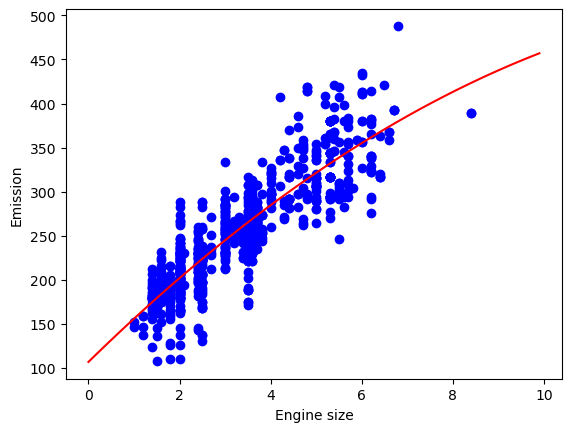

In [13]:
# Let's plot and visualize it
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX + clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r')
plt.xlabel('Engine size')
plt.ylabel('Emission')

In [17]:
# Let's evaluate our model with testing set
from sklearn.metrics import r2_score

test_x_poly = poly.transform(test_x)
test_y_ = clf.predict(test_x_poly)

print('Mean absolute error: %.2f' % np.mean(np.absolute(test_y_ - test_y)))
print('Residual sum of squares(MSE): %.2f' % np.mean((test_y_ - test_y)**2))
print('R2-score: %.2f' % r2_score(test_y, test_y_))

# ===========================================================================================================

Mean absolute error: 23.89
Residual sum of squares(MSE): 930.11
R2-score: 0.78


In [18]:
# Let's get polynomial regression with degree three ↓
poly = PolynomialFeatures(degree=3)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.   ,  2.   ,  4.   ,  8.   ],
       [ 1.   ,  2.4  ,  5.76 , 13.824],
       [ 1.   ,  1.5  ,  2.25 ,  3.375],
       ...,
       [ 1.   ,  3.   ,  9.   , 27.   ],
       [ 1.   ,  3.2  , 10.24 , 32.768],
       [ 1.   ,  3.2  , 10.24 , 32.768]])

In [19]:
# We can also use linear regression to solve it since it has same form of multiple linear regression
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print('Coefficients: ', clf.coef_)
print('Intercept: ', clf.intercept_)


Coefficients:  [[ 0.         25.19279829  5.42369734 -0.57456196]]
Intercept:  [134.09753319]


Text(0, 0.5, 'Emission')

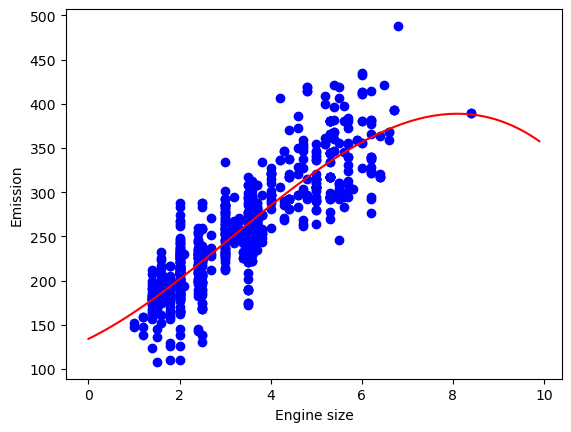

In [20]:
# Okay. The fourth degree cofficient is negetive so let's see what it looks like in graph
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX + clf.coef_[0][2]*np.power(XX, 2) + clf.coef_[0][3]*np.power(XX, 3)
plt.plot(XX, yy, '-r')
plt.xlabel('Engine size')
plt.ylabel('Emission')

In [23]:
# Let's see MAE, MSE, R^2
test_x_poly = poly.transform(test_x)
test_y_ = clf.predict(test_x_poly)
print('Mean absolute error: %.2f' % np.mean(np.absolute(test_y_ - test_y)))
print('Residual sum of squares(MSE): %.2f' % np.mean((test_y_ - test_y)**2))
print('R2-score: %.2f' % r2_score(test_y, test_y_))

Mean absolute error: 23.91
Residual sum of squares(MSE): 936.14
R2-score: 0.77
